<a href="https://colab.research.google.com/github/sfansaria/Breast-Cancer-Diagnosis-KNNClassifier/blob/main/Breast_Cancer_Diagnosis_KNNClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier


In [45]:
#Load the dataset

df = pd.read_csv('/content/drive/My Drive/ml_datasets/breast-cancer.csv')
print(df.head(5))
print(df.shape)
print(df.info())
print(df.columns)


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [48]:
df.drop(['id'], axis=1)
print(df.shape)

(569, 32)


In [51]:
#Convert the diagnosis value of M and B to a numerical value where
#M--Malignant=0
#B--Benign = 1
def diagnosis_value(diagnosis):
  if diagnosis == 'M':
    return 1
  else:
    return 0

df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)

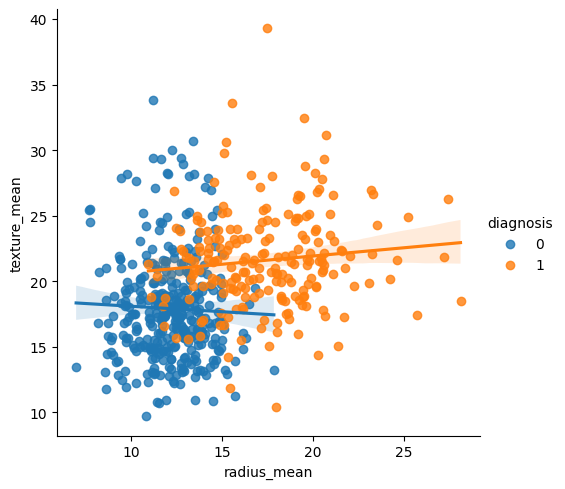

In [52]:
sns.lmplot(x='radius_mean', y = 'texture_mean',hue='diagnosis',data=df)

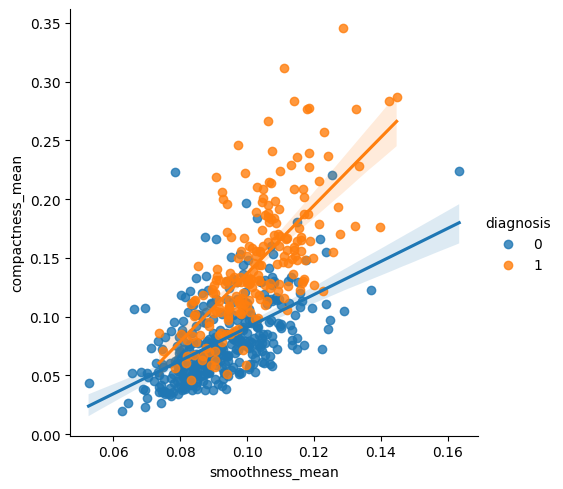

In [53]:
sns.lmplot(x='smoothness_mean', y='compactness_mean', data=df,hue='diagnosis')

In [54]:
X = np.array(df.iloc[:, 1:])
y = np.array(df['diagnosis'])

In [55]:
#Splitting the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [59]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [60]:
#Prediction Score
knn.score(X_test, y_test)

0.9649122807017544

In [63]:
#Performing Cross Validation

neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score

for k in range(1, 51,2):
  neighbors.append(k)
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = 'accuracy')
  cv_scores.append(scores.mean())



In [64]:
MSE = [1-x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print('THe optimal number of neighbors is %d' %optimal_k)

THe optimal number of neighbors is 11


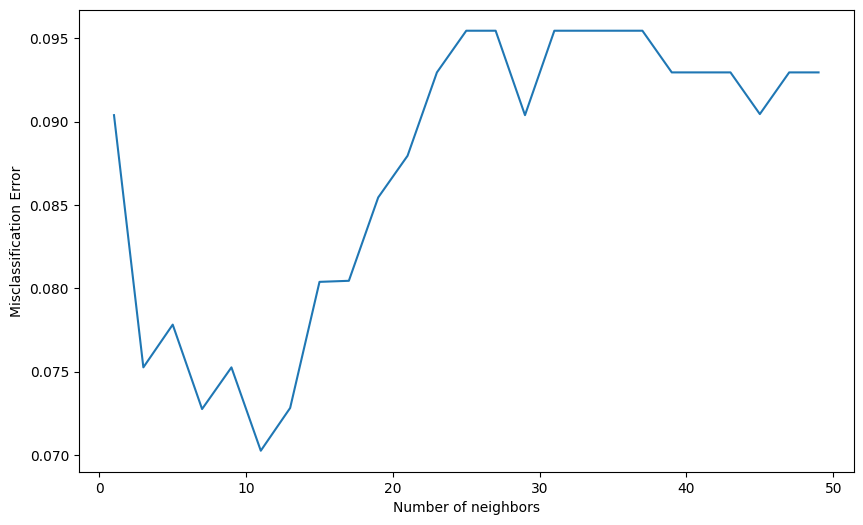

In [65]:
#PLot misclassification error versus k
plt.figure(figsize=(10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [66]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
#Prediction Score
knn.score(X_test, y_test)

0.9649122807017544